## Initialize

In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline

import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import numpy as np
import pytz
import pandas as pd
import seaborn as sns
import math
import scipy
import copy
import plotly.graph_objects as go
import plotly_express as px

from analysis import get_ticker_history, get_etfs_history, History


MOSCOW_TIMEZONE = pytz.timezone('Europe/Moscow')

# From rest
# client = openapi.sandbox_api_client(token)
# client.sandbox.sandbox_register_post()
# client.sandbox.sandbox_clear_post()
# client.sandbox.sandbox_currencies_balance_post(sandbox_set_currency_balance_request={"currency": "USD", "balance": 1000})


# From streaming
# candle_subs = [{'figi': 'BBG000B9XRY4', 'interval': '1min'}, {'figi': 'BBG009S39JX6', 'interval': '1min'}]
# orderbook_subs = [{'figi': 'BBG0013HGFT4', 'depth': 1}, {'figi': 'BBG009S39JX6', 'depth': 3}]
# instrument_info_subs = [{'figi': 'BBG000B9XRY4'}, {'figi': 'BBG009S39JX6'}]

# run_stream_consumer(token,
#                     candle_subs, orderbook_subs, instrument_info_subs,
#                     on_candle_event=print_event,
#                     on_orderbook_event=print_event,
#                     on_instrument_info_event=print_event)



In [2]:
end = dt.datetime.now(dt.timezone.utc)
start = end - dt.timedelta(weeks=52)
interval = 'day'
ticker='FXGD'

# print(etfs)


# print(market.market_candles_get(figi=figi, _from=start.isoformat(), to=end.isoformat(), interval=interval))
# ['payload']['instruments'][0]['figi']

ticker_history = get_ticker_history(ticker=ticker, start=start, end=end, interval=interval)

Text(0.5, 1.0, 'FXGD')

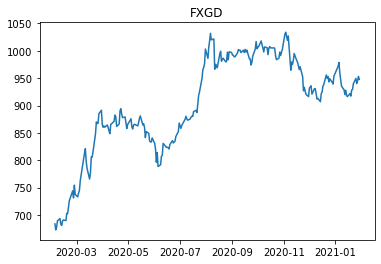

In [3]:
plt.figure()
plt.plot(ticker_history['time'].values, ticker_history['c'])
plt.title(ticker)

In [4]:
etfs_history, etf_tickers = get_etfs_history()

## Download and store history

In [5]:
hist_daily = History(interval='day')
# display(hist_daily.data.time.dtype)
hist_daily.update(reload=0)
hist_daily.data

Local history data loaded successfully
Requesting ETF history from 2021-01-14 07:00:00+00:00 till 2021-02-01 03:02:24.468311+03:00 with an interval=day


Getting forecast with interval=day: 100%|████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.48s/it]


History data updated successfully since 2021-01-14 07:00:00+00:00!


figi           o          c           h          l        v  \
0      BBG004HNZFH2   1050.0000  1060.0000   1060.8001  1050.0000      361   
1      BBG004HNZFH2   1017.0000  1019.0000   1025.0000  1017.0000       19   
2      BBG004HNZFH2   1015.5000   951.1000   1015.5000   917.1000      223   
3      BBG004HNZFH2    990.0000  1034.6000   1045.0000   990.0000      215   
4      BBG004HNZFH2   1065.0000  1065.0000   1065.0000  1065.0000        1   
...             ...         ...        ...         ...        ...      ...   
28763  BBG005HLTYH9  10034.0000  9871.0000  10034.0000  9696.0000    15032   
28435  BBG000000000      0.1071     0.1069      0.1072     0.1068  6586966   
28512  BBG005N1KZX4    976.0000   968.7000    979.5000   964.4000    34139   
28358  BBG00NB6KGN0     17.3700    17.2300     17.3700    17.2100      499   
28807  BBG00NRFC2X2    779.0000   769.8000    779.0000   767.4000    66939   

                            time ticker  
0      2013-04-30 07:00:00+00:00   FXRB  
1      2013-05-03 07:00:00+00:00   FXRB  
2      2013-05-06 07:00:00+00:00   FXRB  
3      2013-05-07 07:00:00+00:00   FXRB  
4      2013-05-08 07:00:00+00:00   FXRB  
...                          ...    ...  
28763  2021-01-29 07:00:00+00:00   FXIT  
28435  2021-01-29 07:00:00+00:00   TUSD  
28512  2021-01-29 07:00:00+00:00   FXRU  
28358  2021-01-29 07:00:00+00:00   SBCB  
28807  2021-01-29 07:00:00+00:00   FXTB  

[28808 rows x 8 columns]

In [6]:
hist_daily.data.time.max()

Timestamp('2021-01-29 07:00:00+0000', tz='tzutc()')

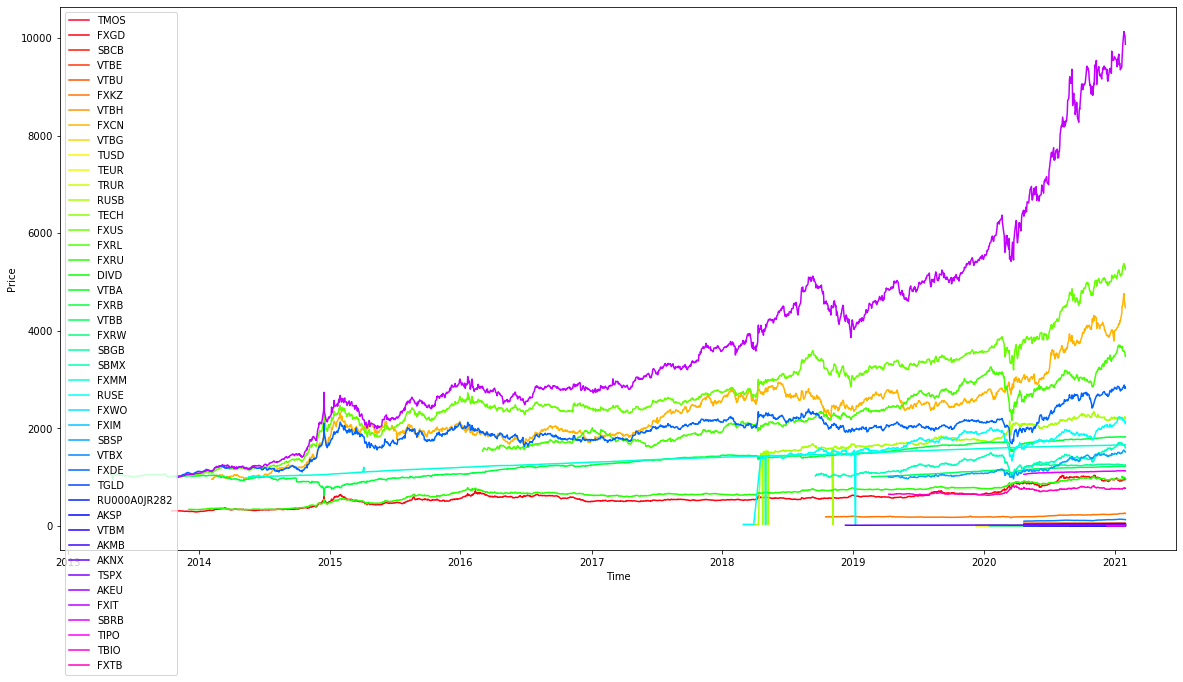

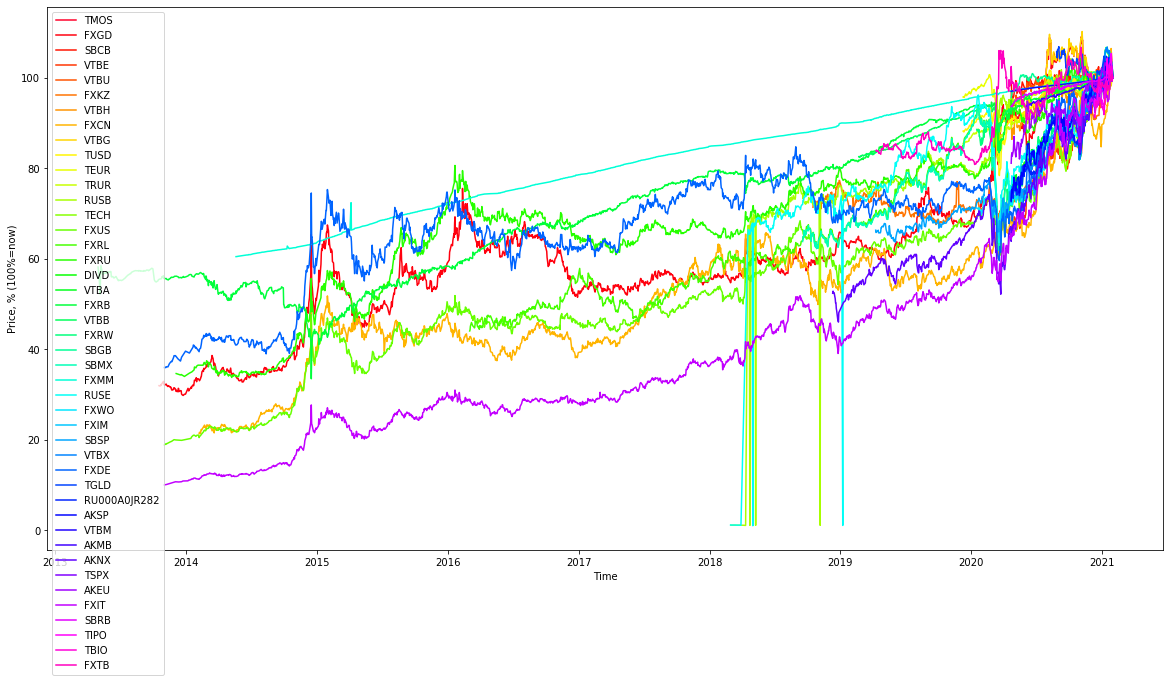

In [7]:
data = hist_daily.data
tickers = hist_daily.tickers
# print(data['time'].dtype)

M = len(hist_daily.tickers)
cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=M-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

def get_last_not_nan(lst):
    for el in lst[::-1]:
        if not np.isnan(el):
            return el
        
    return np.nan


plt.figure(figsize = (20,10))
ax = plt.gca()
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(M)])
for ticker in tickers:
    filter = (data.ticker == ticker)
    t = pd.to_datetime(data.loc[filter, 'time'], utc=True).values
    y = data.loc[filter, 'c'].values # / get_last_not_nan(data[ticker+'_c']) * 100
#     print(ticker, y)

    plt.plot(t, y, label=ticker)
    
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()

plt.figure(figsize = (20,10))
ax = plt.gca()
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(M)])
for ticker in tickers:
    filter = data.ticker == ticker
    t = pd.to_datetime(data.loc[filter, 'time'], utc=True).values
    y = data.loc[filter, 'c'] / get_last_not_nan(data.loc[filter, 'c']) * 100
    plt.plot(t, y, label=ticker)
    
plt.ylabel('Price, % (100%=now)')
plt.xlabel('Time')
plt.legend()

## Basic calculate_statistics

In [8]:
hist_daily.calculate_statistics()

ticker  last_price       max_52w  max_52w_chg  \
figi                                                                
BBG004HNZFH2          FXRB   1822.0000   1826.000000    -0.002191   
BBG005DXDPK9          FXGD    947.8000   1035.024000    -0.084272   
BBG005HLK5V5          None         NaN   2038.190000          NaN   
BBG005H7MXN2          FXDE   2821.5000   2900.000000    -0.027069   
BBG005HM6BL7          None         NaN   2062.740000          NaN   
BBG005HLSZ23          FXUS   5252.0000   5357.280000    -0.019652   
BBG005HM5979          None         NaN   2510.000000          NaN   
BBG005HLTYH9          FXIT   9871.0000  10181.040000    -0.030453   
BBG005N1KZX4          FXRU    968.7000   1000.000000    -0.031300   
BBG005VKB7D7          FXCN   4470.0000   4646.800000    -0.038048   
BBG006GYFHV6          FXMM   1657.7000   1658.952000    -0.000755   
BBG0073DLHS1          FXRL   3471.5000   3753.460000    -0.075120   
BBG00KMXFK61          RUSE   2091.0000   2298.780000    -0.090387   
BBG00KMXH2C2          RUSB   2197.0000   2346.940000    -0.063887   
BBG00M0C8YM7          SBMX   1598.5000   1712.520000    -0.066580   
BBG00M8C8Y03          FXKZ    251.6000    272.228000    -0.075775   
BBG00NNQMD85          AKNX     19.1500     19.694400    -0.027642   
BBG00MF4JRQ8          VTBB   1216.6000   1221.508000    -0.004018   
BBG00NTZWLM4          SBSP   1510.8000   1541.848000    -0.020137   
BBG00NRFC2X2          FXTB    769.8000    835.728000    -0.078887   
BBG000000000          TUSD      0.1069      0.108852    -0.017933   
BBG000000002          TEUR      0.1036      0.105400    -0.017078   
BBG000000001          TRUR      5.8880      6.046080    -0.026146   
BBG00R9805F5          FXWO      1.7620      1.825680    -0.034880   
BBG00R980XY3          FXRW      1.1540      1.191844    -0.031752   
BBG00PVNWFM6          VTBH     10.7300     10.901200    -0.015705   
BBG00NJ6XQ74          SBGB   1245.8000   1277.932000    -0.025144   
BBG00RPRPX12          VTBM      1.0451      1.044724     0.000360   
TCS00A101EJ5          VTBX    124.5500    133.618000    -0.067865   
BBG00RPRPBY4          VTBU     54.2700     55.322400    -0.019023   
TCS00A100P44          SBRB   1124.2000   1129.460000    -0.004657   
BBG00NB6KGN0          SBCB     17.2300     18.172500    -0.051864   
BBG00P5M77Y0          AKSP     12.9700     13.396600    -0.031844   
BBG00PVNWQ15          VTBE     12.8500     13.584200    -0.054048   
BBG00M0DNJ69  RU000A0JR282     42.2500     44.453000    -0.049558   
BBG00Q3HQJ74          AKEU     10.8000     11.201200    -0.035818   
BBG00PGVPH30          VTBA     12.9300     13.420000    -0.036513   
BBG00V7649K4          AKMB      1.0686      1.078840    -0.009492   
BBG00V9V16J8          VTBG      1.1827      1.304654    -0.093476   
BBG111111111          TECH      0.0978      0.102892    -0.049489   
BBG333333333          TMOS      5.5320      5.945760    -0.069589   
BBG222222222          TGLD      0.0771      0.083444    -0.076027   
BBG00Y6D0N45          FXIM      1.0845      1.170450    -0.073433   
TCS00A102EM7          TIPO      0.1006      0.106524    -0.055612   
TCS00A102EQ8          TSPX      0.0965      0.099132    -0.026550   
TCS00A102EK1          TBIO      0.1044      0.107728    -0.030893   
BBG00YZ50N04          DIVD    956.0000   1015.656000    -0.058736   

              max_52w_chg_percent  max_52w-10%  max_52w-10%_chg  \
figi                                                              
BBG004HNZFH2            -0.219058  1643.400000         0.108677   
BBG005DXDPK9            -8.427244   931.521600         0.017475   
BBG005HLK5V5                  NaN  1834.371000              NaN   
BBG005H7MXN2            -2.706897  2610.000000         0.081034   
BBG005HM6BL7                  NaN  1856.466000              NaN   
BBG005HLSZ23            -1.965176  4821.552000         0.089276   
BBG005HM5979                  NaN  2259.000000              NaN   
BBG005HLTYH9            -3.045268  

## Annualized gain
Observations:
1. I have learned here that during the day most stocks drop! The mean day change is negative! It's better on average to buy in the afternoon.
2. It is strange that even of FXMM my error is so large. That means I can do something. Maybe by increasing the analysis interval? Or producing a more long-term estimate?

In [9]:
data = hist_daily.data
# Drop two weird indices


data['day_change'] = data['c'] - data['o']
data['norm_day_change'] = data['day_change'] / data['o']
data['day_change_c2c']= -data.loc[:, ['ticker', 'c']].groupby(by='ticker').diff(-1)  # close to close change 


data.loc[:, "time"] = pd.to_datetime(data["time"], utc=True)

data['dt']= data.loc[:, ['ticker', 'time']].groupby(by='ticker').diff(-1)  # close to close change 
data.loc[data['dt'] != dt.timedelta(days=-1), 'day_change_c2c'] = np.nan
data['rel_day_change_c2c']= data['day_change_c2c'] / data['c']
# Make sure it's 1-day intervals only

data_filtered = copy.deepcopy(data)
data_filtered[(data_filtered['ticker'] == 'RUSE') | (data_filtered['ticker'] ==  'RUSB')] = np.nan


tickers = data.ticker.unique()
N = len(tickers)
data[['day_change_c2c', 'dt', 'rel_day_change_c2c']]

day_change_c2c      dt  rel_day_change_c2c
0                 NaN -3 days                 NaN
1                 NaN -3 days                 NaN
2                83.5 -1 days            0.087793
3                30.4 -1 days            0.029383
4                 NaN -5 days                 NaN
...               ...     ...                 ...
28763             NaN     NaT                 NaN
28435             NaN     NaT                 NaN
28512             NaN     NaT                 NaN
28358             NaN     NaT                 NaN
28807             NaN     NaT                 NaN

[28808 rows x 3 columns]

### Daily gains plot

In [10]:
column = 'rel_day_change_c2c'  # 'day_change'

one_day_params = data.loc[:, ['ticker', column]].groupby(
    by='ticker').mean().rename(columns={column: 'mean'})
one_day_params['var'] = data.loc[:, [
    'ticker', column]].groupby(by='ticker').var()
one_day_params['std'] = data.loc[:, [
    'ticker', column]].groupby(by='ticker').std()
one_day_params['count'] = data.loc[:, [
    'ticker', column]].groupby(by='ticker').count()
one_day_params['SE'] = one_day_params['std'] / np.sqrt(one_day_params['count'])

# Drop weird values
one_day_params.loc[one_day_params['mean'] > 0.1, 'mean'] = np.nan

one_day_params_sorted = one_day_params.sort_values(
    by='mean', ascending=False, axis=0)

fig = go.Figure(
    go.Bar(x=one_day_params_sorted.index, y=one_day_params_sorted['mean']))
fig.update_layout(xaxis_title='Ticker', yaxis_title='Avg. daily gains, %',
                  title='Annulaized gain estimate from close to close daily change')
fig.show()

fig = go.Figure(
    go.Bar(x=one_day_params_sorted.index, y=one_day_params_sorted['mean'], error_y=dict(type='data',
                                                                                        array=one_day_params_sorted['SE'].values)))
fig.update_layout(xaxis_title='Ticker', yaxis_title='Avg. daily gains, %',
                  title='Annulaized gain estimate from close to close daily change ± SE')
fig.show()

fig2 = px.violin(data_filtered, y=column, x='ticker', points = 'all')
fig2.show()

In [11]:
ticker = 'FXIT'
# print(data['ticker' == ticker])
fig3 = px.violin(data_filtered[data_filtered['ticker'] == ticker], y=column, points = 'all')
fig3.show()

### Annualized gains. Assume normality and geometric Brownian motion

In [12]:
days = 52*7
# means =


# According to the solution of the geometric Brownian motion (and assuming it), one gets for the annualized gain
yearly_gain_percent = np.exp(one_day_params['mean'] * days) * 100
yearly_std_percent = np.sqrt(np.exp(
    2 * one_day_params['mean'] * days) * (np.exp(one_day_params['var'] * days) - 1))*100

# Drop weird values
yearly_gain_percent[yearly_gain_percent > 10**3] = np.nan
sorted = yearly_gain_percent.sort_values(ascending=False)

fig = go.Figure(
    go.Bar(x=sorted.index, y=sorted))
fig.update_layout(xaxis_title='Ticker', yaxis_title='Annualized gain, %',
                  title='Annulaized gain estimate from close to close daily change')
fig.show()

print(one_day_params)
print(yearly_gain_percent.sort_values(ascending=False))
# print(yearly_variance_percent_sq)
# annualized_gains_normal

                  mean           var       std  count        SE
ticker                                                         
AKEU          0.000309  1.220188e-04  0.011046    150  0.000902
AKMB          0.000242  2.054663e-06  0.001433    128  0.000127
AKNX          0.001154  2.201810e-04  0.014838    404  0.000738
AKSP          0.000671  1.357649e-04  0.011652    150  0.000951
DIVD         -0.007134  9.659789e-05  0.009828      7  0.003715
FXAU          0.000730  1.684975e-04  0.012981   1086  0.000394
FXCN          0.000945  2.329909e-04  0.015264   1337  0.000417
FXDE          0.000280  1.828525e-04  0.013522   1373  0.000365
FXGD          0.000503  1.759160e-04  0.013263   1443  0.000349
FXIM          0.000761  1.070518e-04  0.010347     39  0.001657
FXIT          0.001258  2.066211e-04  0.014374   1361  0.000390
FXJP          0.000160  1.900433e-04  0.013786   1107  0.000414
FXKZ          0.000924  9.432906e-05  0.009712    446  0.000460
FXMM          0.000204  5.789870e-06  0.

## Correlations

### Day change 

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Program Files\Anaconda\lib\site

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Program Files\Anaconda\lib\site

[array(-3.04202087), array(0.31505803), array(3.85495271), array(0.48432615), array(2.35130079), array(1.63497736), array(2.49403898), array(0.06539986), array(0.15314501), array(0.66612332), array(-33.55055393), array(-0.01337127), array(16.67040546), array(11.5557968), array(-0.42342557), array(0.39045355), array(-0.23018077), array(-2.49471357), array(-0.32358841), array(1.28022424), array(-2.18719586), array(-2.04310853), array(-0.08325114), array(-0.08797714), array(-0.80876684), array(0.2236651), array(0.39522592), array(1.32630453), array(-0.07585145), array(-0.74789714), array(-0.26230902), array(-0.32167489), array(-0.51083105), array(-0.11526985), array(0.10978866), array(-0.3524986), array(-0.09206455), array(0.35936525), array(-0.12187711), array(-1.24655692), array(-0.23950189), array(-0.11159349), array(0.13369486), array(0.01082252), array(0.1731066), array(-1.24977102), array(-0.19005713)]


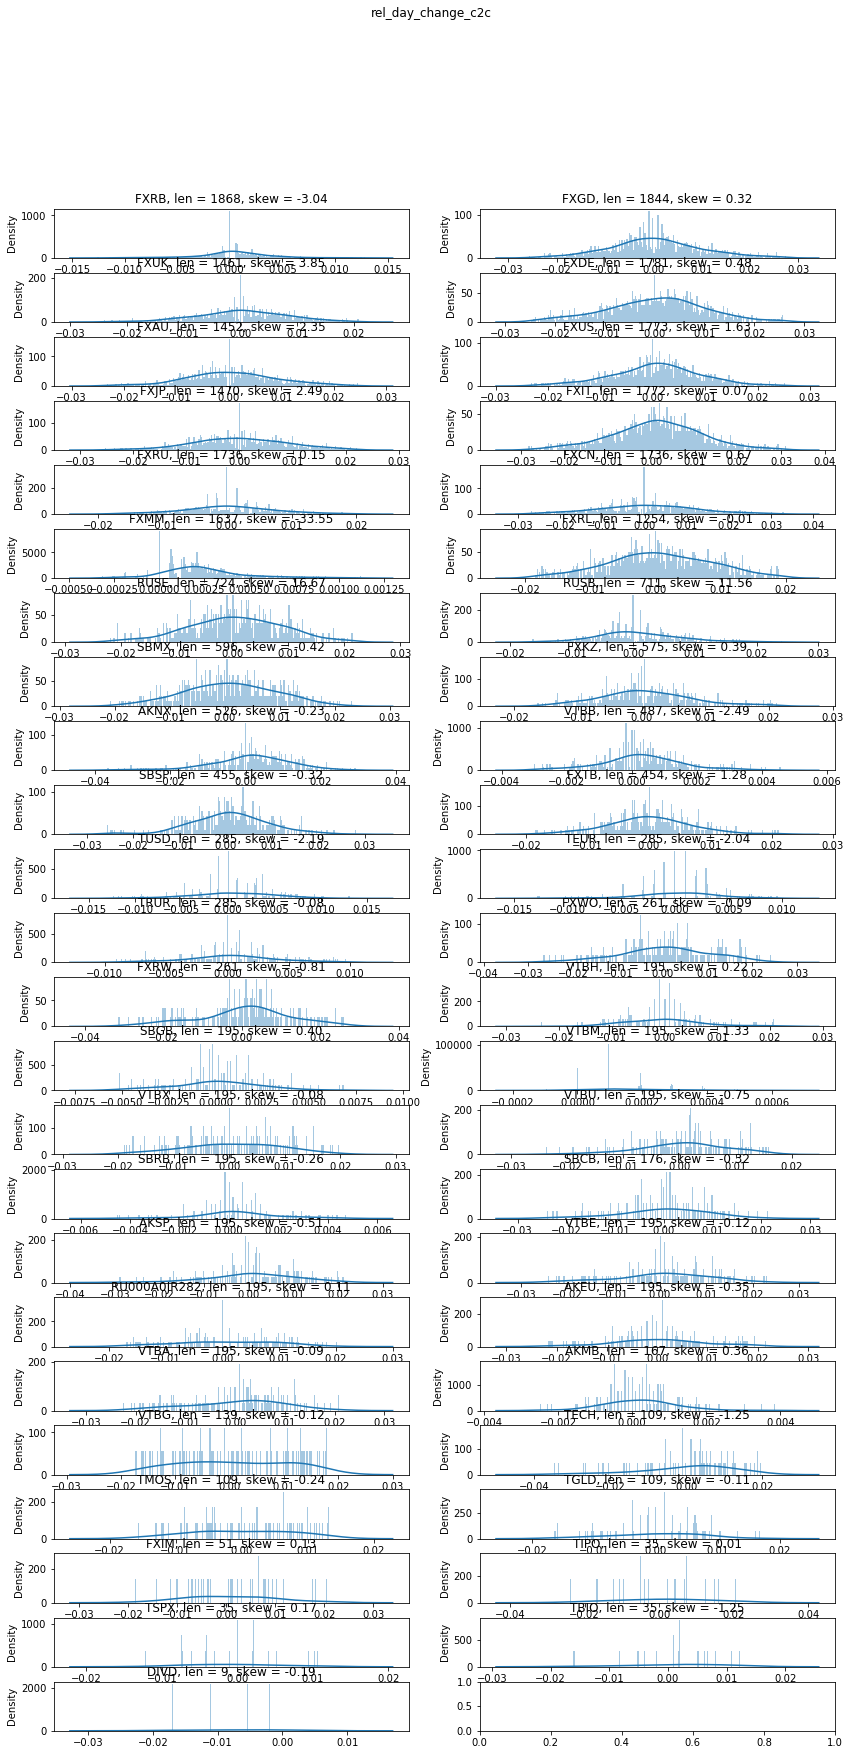

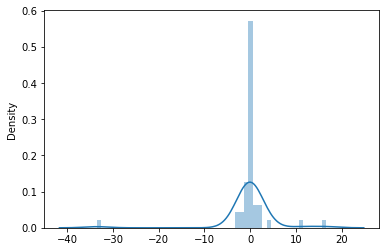

In [13]:
bins = 200
figsize = np.array([1, 2]) * 14
quant = 0.98
column = 'rel_day_change_c2c'  # 'day_change_c2c'  # 'day_change'




cols = 2
rows = math.ceil(len(tickers)/cols)
fig, axes = plt.subplots(nrows =rows, ncols = cols, figsize = figsize, gridspec_kw = {'hspace': 0.3})
axes = np.array(axes).flat

skews = []
for ticker, ax in zip(tickers, axes):
    dat1=data.loc[data.ticker ==ticker, column]
#     dat1 = dat1[np.logical_not(pd.isna(dat1))]
#     print(dat1[np.logical_not(pd.isna(dat1))])
    
    plot_range = np.nanquantile(dat1.values, [1-quant, quant])
    dat2 = dat1[(dat1 >= plot_range[0]) & (dat1 <= plot_range[1])]
    if len(dat2) > 0:
        sns.distplot(dat2.values, bins = bins, ax = ax)
    skew = scipy.stats.skew(dat1, nan_policy= 'omit').data
    skews.append(skew)
    ax.set_title(f'{ticker}, len = {len(dat1)}, skew = {skew:.2f}')
#     plot_range = np.quantile(dat1.values, [1-quant, quant])
#     ax.set_xlim(plot_range)

fig.suptitle(column);
    
plt.figure()
# plt.hist(skews)
sns.distplot(skews)
print(skews)

### Day change normalized to openning

In [ ]:
# fig, axes = plt.subplots(nrows =rows, ncols = cols, figsize = figsize, gridspec_kw = {'hspace': 0.3})
# axes = np.array(axes).flat

# skews = []
# for ticker, ax in zip(tickers, axes):
#     dat1=data.loc[data.ticker ==ticker, 'norm_day_change']
# #     print('Data points: ', len(dat1))
#     plot_range = np.quantile(dat1.values, [1-quant, quant])

#     dat2 = dat1[(dat1 >= plot_range[0]) & (dat1 <= plot_range[1])]
    
#     sns.distplot(dat2.values, bins = bins, ax = ax)
    
#     skew = scipy.stats.skew(dat1)
#     skews.append(skew)
#     ax.set_title(f'{ticker}, len = {len(dat1)}, skew = {skew:.2f}')


# #     plot_range = np.quantile(dat1.values, [1-quant, quant])
# #     ax.set_xlim(plot_range)

# fig.suptitle('Normalized day changes');

# plt.figure()
# plt.hist(skews)
# print(skews)

The gain from normalization is not evident. Abandon

### Correlation matrix

In [14]:
N = len(tickers)
cov_matrix = np.full((N, N), np.nan)


for i in range(N):
    ser_i = copy.deepcopy(data.loc[data.ticker == tickers[i], [
                          'time', column]]).set_index('time')
    index_i = set(ser_i.index)
    for j in range(N):
#         if i==j:  # diagonal elements are not calculated
#             continue
        ser_j = copy.deepcopy(data.loc[data.ticker == tickers[j], [
                              'time', column]]).set_index('time')
        common_index = index_i & set(ser_j.index)

        cov_matrix[i, j] = (ser_i.loc[common_index, column].cov(ser_j.loc[common_index, column])
                            / np.sqrt(ser_i.loc[common_index, column].var() * ser_j.loc[common_index, column].var())
                            )

cov_matrix

array([[ 1.        , -0.43553736, -0.46590641, ..., -0.20235194,
        -0.25867106, -0.38434536],
       [-0.43553736,  1.        ,  0.42428226, ..., -0.17814782,
        -0.25466721,  0.38168833],
       [-0.46590641,  0.42428226,  1.        , ...,         nan,
                nan,         nan],
       ...,
       [-0.20235194, -0.17814782,         nan, ...,  1.        ,
         0.33487127,  0.24537244],
       [-0.25867106, -0.25466721,         nan, ...,  0.33487127,
         1.        ,  0.41309849],
       [-0.38434536,  0.38168833,         nan, ...,  0.24537244,
         0.41309849,  1.        ]])

In [15]:
# Cluster the correlation matrix
import scipy.cluster.hierarchy as sch

cov_df = pd.DataFrame(cov_matrix, columns = tickers, index = tickers)
X = cov_df.values
d = sch.distance.pdist(X)   # vector of pairwise distances
# print('d', d)

d = d[~np.isnan(d)]

L = sch.linkage(d, method='complete')
# print('L', L)
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
# print(ind)

columns = [cov_df.columns.tolist()[i] for i in list((np.argsort(ind)))]
# print(columns)
clustered_cov_df = cov_df.loc[columns, columns]

In [16]:
import plotly.express as px
# cov_df = pd.DataFrame(cov_matrix, columns = tickers, index = tickers)

# # Sort by max of a column/row
# sorted_ticker_inds =  np.sum(np.abs(cov_matrix), axis = 0).argsort()
# print(cov_df.columns)
# cov_df = cov_df.iloc[sorted_ticker_inds, sorted_ticker_inds]
# print(cov_df.columns)

# plt.figure(figsize = (10,10))
# sns.heatmap(cov_df)
fig = px.imshow(clustered_cov_df, x=clustered_cov_df.columns, y = clustered_cov_df.index)
fig.show()
# ax = plt.gca()
# ax.set_xticklabels(cov_df.columns)
# ax.set_yticklabels(cov_df.index)
# [tickers[ind] for ind in sorted_ticker_inds]

### Individual correlation profile

In [18]:
ticker = 'FXIT'


def plot_one_correlation(ticker):

    ind = np.argwhere(np.array(clustered_cov_df.columns == ticker))[0,0]
    d3 = clustered_cov_df.iloc[ind, :].sort_values(ascending = False)

    fig = go.Figure(go.Bar(x=d3.index, y = d3))
    fig.update_layout(title_text=ticker + ' correlations', xaxis_title = 'Ticker', yaxis_title = 'Correlation')
    fig.show()

plot_one_correlation(ticker)

In [20]:
plot_one_correlation('FXCN')

In [19]:
plot_one_correlation('AKNX')

In [21]:
plot_one_correlation('SBSP')